Midterm Project \[ROBT407\]
===========================
Fall Semester, 2020

This project aims to provide you a hands-on experience to apply machine learning algorithms to Event-Related Potential (EEG) data acquired from healthy subjects. 

In a supervised learning framework, given $X := \{x_{1}, ..., x_{m}\}$ with corresponding labels $Y := \{y_{1}, ..., y_{m}\}$, where $y \in \pm 1$ for $i = 1,..., m$. We seek to infer a function $g:X \rightarrow \{\pm 1\}$ to predict accurately whether a new observation belongs to class $+1$ or $-1$. 

In general, the $g$ - could be any learning machine (linear regression, logistic regression, support-vector machines, or neural networks) defined on any learning problem (supervised, semi-supervised, unsupervised. 

This project, is a chance to you and your team to design a novel learning model to improve BCI/BMI system performance on ERP data  (i.e. to come up with a new angle on an old problem). Successful implementation on benchmark datasets has a potential to become a fully-fledged research papers. As, everyone of you can go way above and beyond the state-of-the-art methods. 

## Important Dates:
- Announced date: October, 16, 2020
- Final Report Date: October, 30, 2020 

## Method of Delivery 
Assignment deliverables should be submitted via Moodle to the course instructor before the due date.

### Deliverables:
1. Report describing in detail the work of a team with the following sections (use the ieee-latex-conference-template; - length 4-6 pages long):
  - Abstract
  - Introduction
  - Materials and Methods
  - Results
  - Conclusion
  - References
  - Contribution (what and how each member contributed to the project)

2. Source Codes in Jupyter Notebooks (well documented which include the descriptions of all code cells)

## Level of Collaboration Allowed

* Collaboration is allowed on this assignment – each group should consist of maximum of three students.  Discussions on course materials and implementation of the project are encouraged.

* Each team should write the final solutions/reports separately and understand them fully.  External resources can be consulted, but not copied from.

* You are expected to discuss and learn together (on your own) how to use a specific machinelearning tool. There’s bunch of tutorials both with videos, texts and other materials

## Grading Criteria 

- 40% - Implementation (well documented source code in Jupyter notebooks)
- 20% - Performance accuracy
- 20% - Overall work and report quality
- 20% - Discussion (for example of success/failure; limitations, etc.


## Machine learning tools:

Since implementation of standard algorithms from scratch may take up significant amount of time, in this project, you are encouraged to use available machine learning tools/libraries and concentrate on model selection problem by applying an algorithm of your interest for a real-world problem.  However,there is no restriction posed if you can manage your time and want to implement a novel algorithm from scratch.

Although there are so many machine learning libraries implemented in different languages, this task is based on the scikit-learn machine learning library to achieve your project goals.

### Project Tasks:

Perform model selection (machine learning) to estimate the model with optimal hyperparameters. Different learning machines exist in the scikit-learn machine learning library such as linear models, neural  networks,  trees,  or  kernel  methods  etc. You are expected to adapt and apply  an  algorithm  of your  interest,  and  compare  with  other  algorithms available in the scikit-learn.  One of your goal is to try  to  outperform  other standard algorithms/methods  in  terms  of a generalization performance.  Suppose you chose a neural network model, then your task would be to perform  model  selection  and  compare  the  algorithm  with  a  support-vector machines, logistic regression and other algorithms/methods.

The following steps summarize the important steps in your project:

1.  Consider an ERP data $D$
2.  Apply an algorithm of your choice on $D$
3.  Estimate its generalization error $E_{test}$
4.  if generalization error is smaller than what exists in the
    literature for the same dataset:

-   `End of the process: Outcome -> Grade A`

1.  Else

-   Go back to step 2 with another algorithm or change the learning strategy.



Specific Tasks
--------------

-   Review the lecture Hyperparameters and Model Validation and write
    your own machine learning pipeline. Also, refer to the examples in
    the Hands-on data analysis session - Jupyter notebook tutorial and
    report best generalization performance.

-   You should try to include some of the feature selection algorithms
    that are available in the scikit learn library
    (http://scikit-learn.org/stable/modules/featureselection.html). Read
    the following paper to learn more about the types of feature
    extraction methods that canbe used.

    - Lotte, Fabien, et al.  ”A review of classification algorithms for EEG-based brain–computer interfaces: a 10 year update.” Journal of neural engineering 15.3 (2018): 031005.

Datasets
--------

Most datasets for your project are available via MOABB toolbox
(https://github.com/NeuroTechX/moabb). However, I have already
downloaded and converted all ERP data into MNE format for easier
processing and visualization.

You can download them and save in the local directory where the source
codes will ba available.

https://drive.google.com/drive/folders/1d4wo-TjSjENMh-iH-BV9RmhpVr2nP2Pu?usp=sharing

- NU data  (data_allsubjects.pickle): 
- ALS data (ALSdata.pickle): 
- EPFL data (EPFLP300.pickle): 
- BNCI data (BNCI2015003.pickle): 


Loading the datasets
--------------------

You can use the following function to load the data.

Make sure you install MNE version 0.18

`pip install mne==0.18`

    def loaddata(filename):   
        with open(filename, 'rb') as handle:
            data = pickle.load(handle)
        return data

    --- 
    import pickle 

    filename = 'NU data'
    data = loaddata(filename)

Here, the loaded **data** will be MNE object that you are already
familiar with, from which you can extract the numpy array, and convert
it to sklearn acceptable 2D array.

Load the data

In [61]:
import pickle
import mne

def loaddata(filename):   
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
    return data

You can load these datasets from the shared google drive folder 
 
 - NU data  (data_allsubjects.pickle): 
 - ALS data (ALSdata.pickle): 
 - BNCI data (BNCI2015003.pickle): 
 - EPFL data (EPFLP300.pickle)

In [72]:
# load the file 
filename = 'BNCI2015003.pickle'
data = loaddata(filename)

# the data is a list containing subject specific MNE data objects
print("Total number of subjects in the data:", len(data))


Total number of subjects in the data: 10


In [73]:
subject = 0
data[subject]

# %%
s1 = data[0]
s1.info


<Info | 8 non-empty values
 bads: []
 ch_names: Fz, Cz, P3, Pz, P4, PO7, Oz, PO8
 chs: 8 EEG
 custom_ref_applied: False
 dig: 11 items (3 Cardinal, 8 EEG)
 highpass: 1.0 Hz
 lowpass: 24.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 128.0 Hz
>

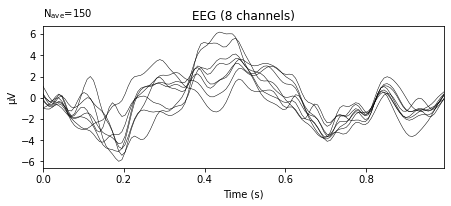

In [74]:
s1['Target'].average().plot();


In [66]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [68]:
epochs = s1
epochs.pick_types(eeg=True)
X = epochs.get_data()  # features
y = epochs.events[:, -1] # labels 
X.shape, y.shape

((3342, 32, 77), (3342,))

## Vectorizer()
Transform n-dimensional array into 2D array of n_samples by n_features.
 
This class reshapes an n-dimensional array into an n_samples * n_features
array, usable by the estimators and transformers of scikit-learn.

In [70]:
from mne.decoding import Vectorizer
clf = make_pipeline(Vectorizer(), StandardScaler(),
                     LogisticRegression(solver='lbfgs'))
# %%
clf.fit(X, y)
# %%
clf.predict(X[:9])


array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [71]:
# cross validation example 
cross_val_score(clf, X, y, cv = 5)

array([0.86995516, 0.8819133 , 0.87874251, 0.85329341, 0.85628743])

In [1]:
import pickle
import mne

def loaddata(filename):   
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
    return data

You can load these datasets from the shared google drive folder 

- NU data  (data_allsubjects.pickle): 
- ALS data (ALSdata.pickle): 
- BNCI data (BNCI2015003.pickle): 
- EPFL data (EPFLP300.pickle)


In [55]:
# load the file 
filename = 'EPFLP300.pickle'
data = loaddata(filename)

In [56]:
# the data is a list containing subject specific MNE data objects
print("Total number of subjects in the data:", len(data))

Total number of subjects in the data: 8


In [57]:
subject = 0
data[subject]

<Epochs  |   3342 events (all good), 0 - 0.59375 sec, baseline off, ~62.9 MB, data loaded,
 'NonTarget': 2785
 'Target': 557>

In [58]:
s1 = data[0]
s1.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 32 EEG
 custom_ref_applied: False
 description: EPFL P300 dataset
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 1.0 Hz
 lowpass: 15.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 128.0 Hz
>

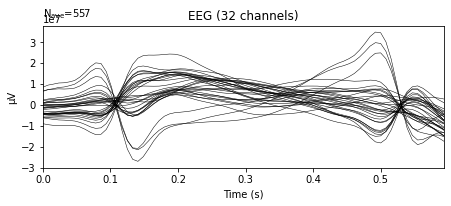

In [59]:
%matplotlib inline
s1['Target'].average().plot();

## Classification using sklearn example 

You can use the following example to get started

In [36]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [38]:
epochs = s1

In [39]:
epochs

<Epochs  |   1728 events (all good), 0 - 0.601562 sec, baseline off, ~16.5 MB, data loaded,
 'NonTarget': 1440
 'Target': 288>

In [52]:
epochs.pick_types(eeg=True)
X = epochs.get_data()  # features
y = epochs.events[:, -1] # labels 
X.shape, y.shape

((1728, 16, 78), (1728,))

## Vectorizer()
Transform n-dimensional array into 2D array of n_samples by n_features.

This class reshapes an n-dimensional array into an n_samples * n_features
array, usable by the estimators and transformers of scikit-learn.


In [48]:
from mne.decoding import Vectorizer
clf = make_pipeline(Vectorizer(), StandardScaler(),
                     LogisticRegression(solver='lbfgs'))

In [49]:
clf.fit(X, y)

Pipeline(steps=[('vectorizer',
                 <mne.decoding.transformer.Vectorizer object at 0x000001B8B1A39280>),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [50]:
clf.predict(X[:9])

array([1, 1, 2, 1, 1, 1, 1, 1, 1], dtype=int64)

In [51]:
cross_val_score(clf, X, y, cv = 5)

array([0.88728324, 0.89017341, 0.91907514, 0.91304348, 0.87246377])